# 방법용 CCTV 위치와 인구 데이터분석
- https://data.busan.go.kr/bdip/opendata/detail.do?publicdatapk=15082060&searchKeyword=%EB%B0%A9%EB%B2%95%EC%9A%A9%20cctv&searchOption=OR&from=dsh&uuid=270b5c12-4810-4132-b2a6-24a3bdb3fc75#n
- 파일 데이터 "부산광역시_방법용 CCTV 정보 20230622.CSV" 다운로드
- 목표: CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
import pandas as pd
file_path = "./ref/부산광역시_방범용CCTV 정보_20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.head(10)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
3,(10차)강서-10-233-2대저2동3147근린공원(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
4,(10차)강서-10-235-2대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
5,(10차)강서-10-236-1송정동1731녹산공단대창스틸,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
6,(10차)강서-10-237-0강동동1064북정마을논길,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
7,(10차)강서-10-237-1강동동1064북정마을논길,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
8,(10차)강서-10-236-0송정동1731녹산공단대창스틸,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
9,(10차)강서-10-235-0대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차


In [2]:
# CCTV.columns =["x","xx","local"]
# cctv=CCTV.rename(columns={"CCTV 그룹":"local"})['local']

############################################################
cctv=CCTV.rename(columns={"CCTV 그룹":"local"})
cctv=cctv['local']
cctv

0        강서-10차
1        강서-10차
2        강서-10차
3        강서-10차
4        강서-10차
         ...   
6100    해운대-폐공가
6101    해운대-폐공가
6102    해운대-폐공가
6103    해운대-폐공가
6104    해운대-폐공가
Name: local, Length: 6105, dtype: object

In [3]:
# 방법 1
cctv = cctv.apply(lambda x: x.split("-")[0])
# 방법 2
# local_list = []
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv=pd.Series(local_list)
# 방법3
# cctv = cctv.str.extract(r"(\D+)-")[0]

cctv=cctv.value_counts()
cctv=cctv.reset_index()
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [4]:
cctv.sample(10)

,local,count
14,기장,344
13,서구,348
12,남구,351
7,영도,381
0,사하,431
2,해운대,418
11,강서,352
6,진구,395
9,동구,374
10,수영,365


## 행정동별 연령별 인구현황
-https://jumin.mois.go.kr/ageStatMonth.do <br>
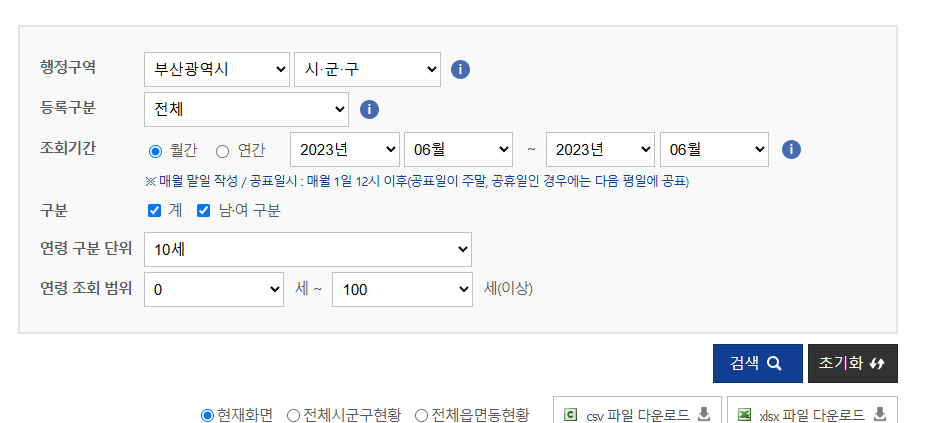

In [5]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)
file_path2="./ref/연령별인구현황_월간.xlsx"
ori =pd.read_excel(file_path2,sheet_name='연령별인구현황',skiprows=3)
ori

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17
5,2623000000,부산광역시 부산진구,"357,475","357,475","19,405","24,054","49,960","49,256","49,715","55,808",...,"11,921","26,314","24,077","24,451","28,682","31,317","18,484","9,708","1,324",31
6,2626000000,부산광역시 동래구,"272,590","272,590","18,893","25,485","29,383","31,940","43,738","43,823",...,"12,258","14,375","15,878","22,379","22,669","23,413","13,415","6,220",969,28
7,2629000000,부산광역시 남구,"255,786","255,786","14,568","22,340","32,784","26,678","38,448","41,257",...,"10,895","15,450","12,933","19,212","20,859","22,318","14,312","6,963",958,29
8,2632000000,부산광역시 북구,"276,684","276,684","16,736","21,609","31,476","33,069","37,773","49,562",...,"10,432","14,743","15,645","18,731","26,357","26,262","12,752","6,459","1,005",35
9,2635000000,부산광역시 해운대구,"383,355","383,355","24,071","35,804","41,691","42,119","60,575","67,383",...,"17,293","19,949","21,383","31,709","35,383","32,640","18,247","9,638","1,534",48


In [6]:
data=ori[['행정기관','총 인구수']]
data.columns=['local','population']
data=data.loc[1:]
data['local']=data['local'].apply(lambda x:x.replace('부산광역시 ',"").strip())
data=data.reset_index(drop=True) #drop=True는 기존 인덱스를 삭제하고 새롭게 부여
print(data)
print(cctv)

   local population
0     중구     39,311
1     서구    104,449
2     동구     86,809
3    영도구    107,006
4   부산진구    357,475
5    동래구    272,590
6     남구    255,786
7     북구    276,684
8   해운대구    383,355
9    사하구    300,922
10   금정구    218,711
11   강서구    143,052
12   연제구    202,919
13   수영구    175,511
14   사상구    203,029
15   기장군    179,384
   local  count
0     사하    431
1     사상    422
2    해운대    418
3     동래    404
4     금정    403
5     북구    403
6     진구    395
7     영도    381
8     연제    377
9     동구    374
10    수영    365
11    강서    352
12    남구    351
13    서구    348
14    기장    344
15    중구    337


In [7]:
# total = pd.concat([cctv,data],axis=1)
# 방법 1
# total.columns = ['local','count','localx','population']
# total=total.drop(columns=['localx'])
# 방법 2
# total=total.drop(total.columns=[2],axis=1)#이름이 같을 경우 인덱스가 사용안됨.

In [8]:
# data['local']=data['local'].apply(lambda x:x.replace(" ","")) # 공백제거

In [9]:
data['local']=data['local'].apply(lambda x:x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip()) #strip()으로 공백제거

In [10]:
total = pd.merge(cctv, data, on='local')
total['population']= total['population'].str.replace(",","").astype(int)
total=total.sort_values(by="population",ascending=False)
total=total.set_index('local')
type(total)

pandas.core.frame.DataFrame

Text(0.3, 0.3, '한글')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

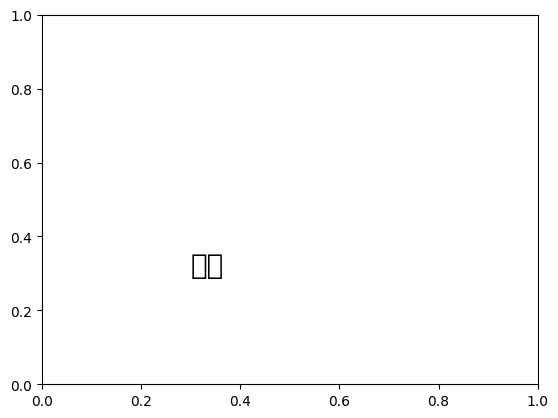

In [11]:
# # OS에 사용가능한, 설치된 폰트를 나열
# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import rc
# import matplotlib.font_manager as fm
# # fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# # fontlist
# plt.rc('font', family="NanumBarunGothic")
# plt.text(0.3,0.3,'한글', size=20)

Text(0.3, 0.3, '한글')

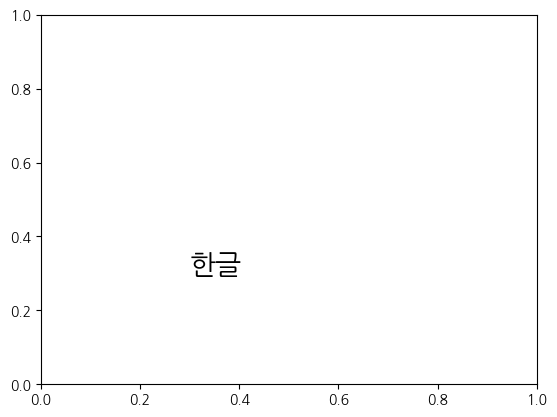

In [17]:
# 윈도우용 폰트  경로 설정
path= "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글', size=20)

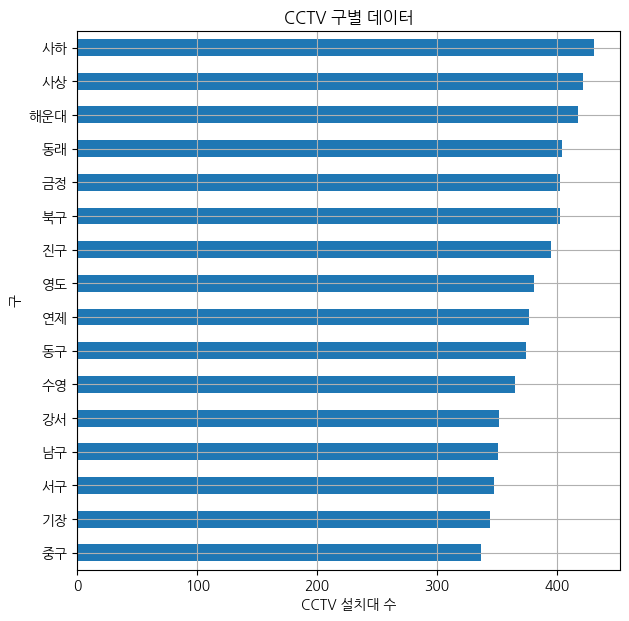

In [20]:
plt.figure()
total['count'].sort_values().plot(kind='barh',grid=True,figsize=(7,7),ylabel='구')

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")

plt.show()

#######################################
# plt.figure()
# total['count'].sort_values().plot(x=total['local'][1],kind='barh',grid=True,figsize=(7,7),ylabel='구')

# plt.title("CCTV 구별 데이터")
# plt.xlabel("CCTV 설치대 수")

# plt.show()


[]

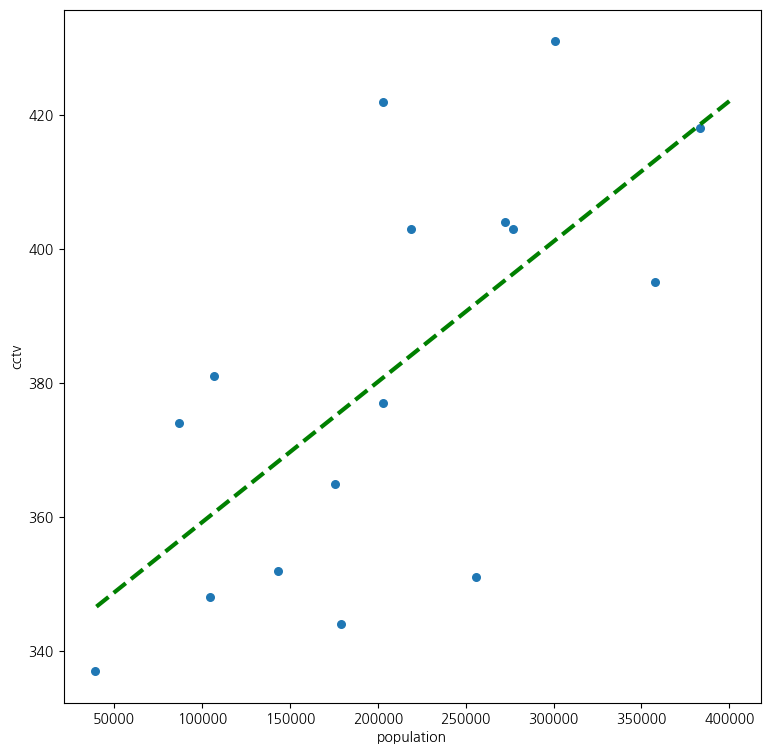

In [18]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.scatter(total['population'],total['count'],s=30)

plt.xlabel('population')
plt.ylabel('cctv')

plt.plot()

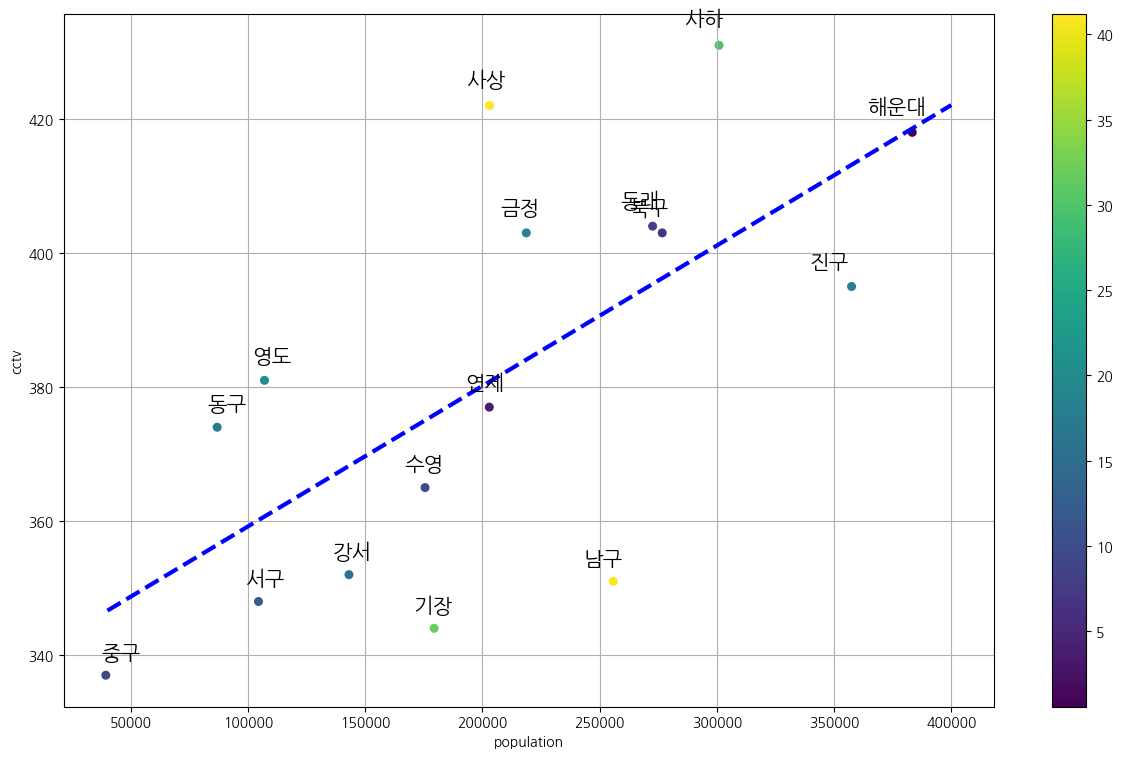

In [19]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(15,9))
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='b')

# 오차
total['err']= np.abs(total['count']-f1(total['population']))

plt.scatter(total['population'],total['count'],s=30, c=total['err'])
plt.xlabel('population')
plt.ylabel('cctv')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.007,total.index[i],fontsize=15)
plt.grid()
plt.colorbar()
plt.show()

## 지역별 범죄 통계
- https://www.data.go.kr/data/3074462/fileData.do
- 서울 과 부산 데이터를 지역구로 뽑아 보자

In [15]:
import pandas as pd
import numpy as py
file_path = './ref/경찰청범죄발생지역별 통계20231231.csv'
ori=pd.read_csv(file_path,encoding="EUC-KR")
ori.columns.values

ex1=ori.copy()
filter = [col for col in ex1.columns if "서울" in col]

ex1

,범죄대분류,범죄중분류,서울종로구,서울중구,서울용산구,서울성동구,서울광진구,서울동대문구,서울중랑구,서울성북구,...,외국러시아,외국튀르키예,외국중국,외국일본,외국필리핀,외국베트남,외국태국,외국말레이시아,외국인도네시아,외국기타국가
0,강력범죄,살인기수,2,0,1,1,0,2,4,1,...,0,0,0,0,1,0,0,0,0,0
1,강력범죄,살인미수등,1,3,2,1,2,3,2,0,...,1,0,1,0,0,0,0,0,0,1
2,강력범죄,강도,5,6,3,2,5,4,2,1,...,0,0,0,0,3,0,0,0,0,0
3,강력범죄,강간,25,30,45,22,42,36,40,25,...,0,0,3,1,3,1,1,1,0,3
4,강력범죄,유사강간,10,4,4,6,9,5,9,7,...,0,0,0,0,1,0,0,1,0,1
5,강력범죄,강제추행,204,182,195,92,188,107,118,105,...,1,0,2,4,4,3,4,1,0,10
6,강력범죄,기타 강간 강제추행등,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
7,강력범죄,방화,4,13,16,4,5,11,4,7,...,0,0,0,0,0,0,0,0,0,0
8,절도범죄,절도범죄,1173,1523,971,891,1619,1278,1400,982,...,0,0,0,1,4,2,1,0,1,3
9,폭력범죄,상해,127,127,107,79,111,101,121,74,...,0,0,1,2,3,3,2,2,1,5
